In [1]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

In [2]:
!python3 -m spacy download en_core_web_lg

2022-10-14 05:40:53.138916: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 7.9 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [3]:
nlp = spacy.load('en_core_web_lg')

In [4]:
with open('IHaveADream.txt', 'r') as file:
    text = file.read()

## Function
This function will be used through out the whole notebook

In [6]:
def token_frequency(txt, not_include=[], only_include=[], verbos=False):
    if len(not_include) != 0 and len(only_include) != 0: 
        raise Exception('Cannot specify both "not_include" and "only_include"')
    words = dict()
    doc = nlp(txt)
    for token in doc:
        if token.pos_ in not_include: continue
        if len(only_include) != 0 and token.pos_ not in only_include: continue
        if nlp.vocab[token.lemma_].is_stop: continue
        if token.lemma_ not in words.keys():
            words[token.lemma_] = 1
        else: words[token.lemma_] += 1
        if verbos: print(f"{token.text:{16}} {token.pos_:{12}} {token.dep_:{12}} {token.lemma_:{16}} {spacy.explain(token.tag_)}")
    
    words = dict(sorted(words.items(), key=lambda item: item[1], reverse=True))
    return words

## Martin Luther King : I Have A Dream

In [7]:
words = token_frequency(text, not_include=['SPACE', 'PUNCT', 'NUM', 'SYM', 'X'], verbos=False)

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

In [9]:
df = pd.DataFrame({'word':words.keys(), 'frequency':words.values()})
df.head(30)

,word,frequency
0,freedom,20
1,let,13
2,come,12
3,day,12
4,ring,12
5,nation,11
6,Negro,11
7,dream,11
8,today,9
9,justice,8


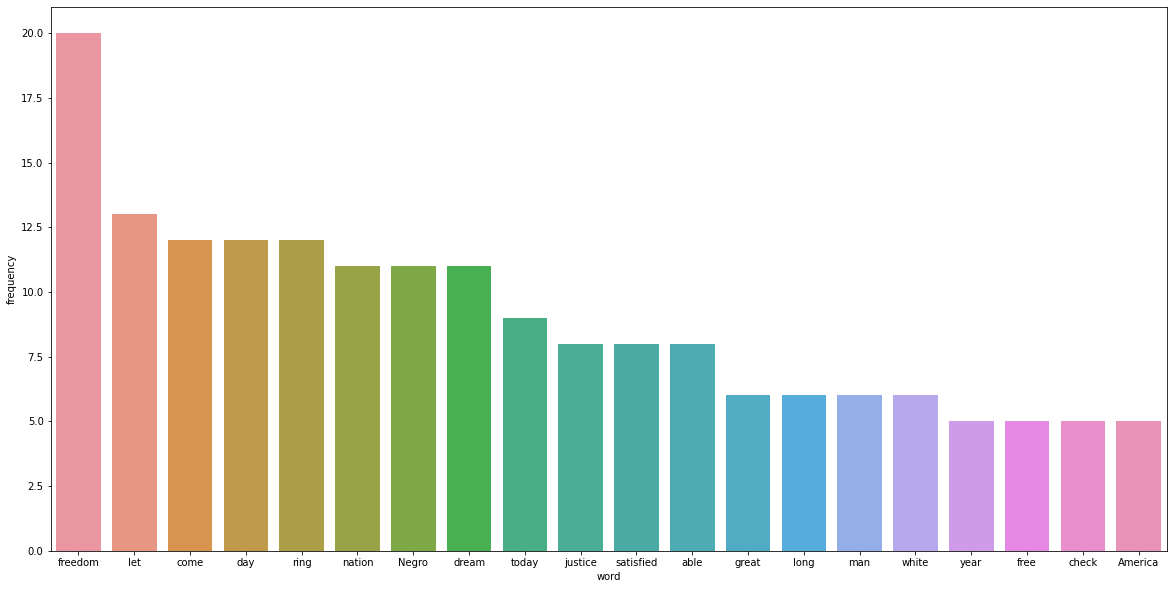

In [10]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df.iloc[:20], x='word', y='frequency');

In [11]:
wordcloud = WordCloud(width=1200, height=800, background_color='#FFFFFF').generate_from_frequencies(words)

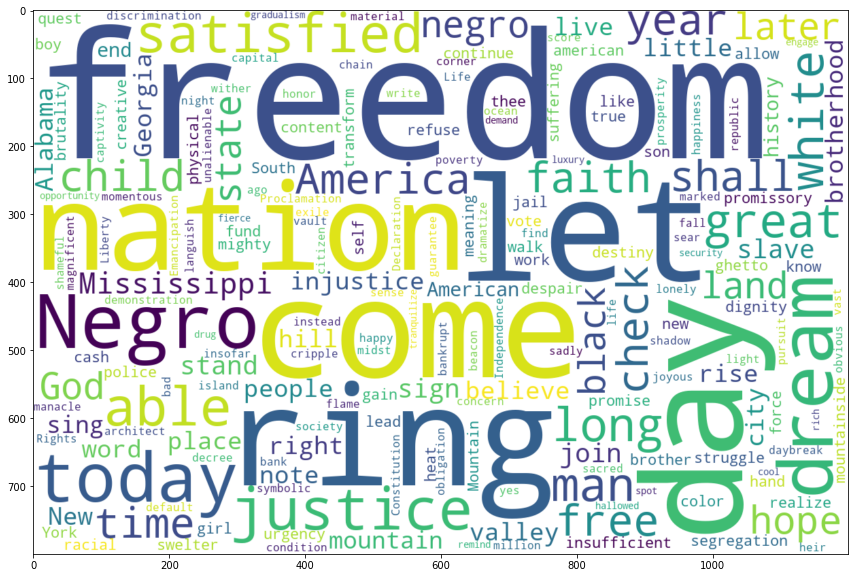

In [12]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')

In [14]:
verbs = token_frequency(text, only_include=['VERB'], verbos=False)

In [15]:
verbs_df = pd.DataFrame({'word':verbs.keys(), 'frequency':verbs.values()})
verbs_df.head(20)

,word,frequency
0,let,13
1,come,12
2,join,3
3,stand,3
4,live,3
5,believe,3
6,rise,3
7,sing,3
8,sign,2
9,cash,2


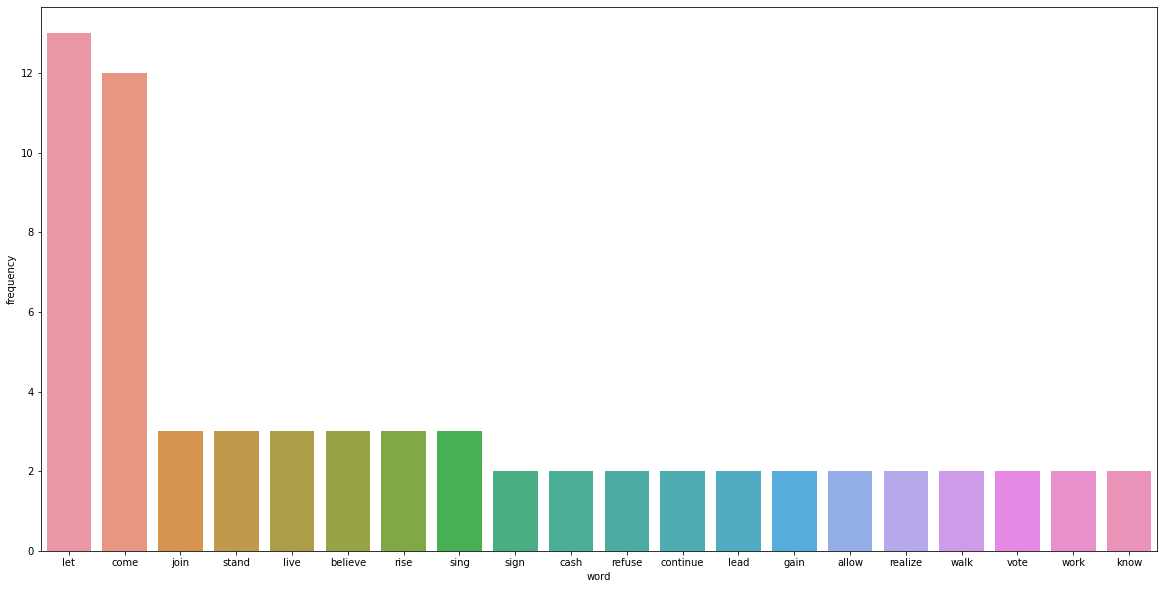

In [16]:
plt.figure(figsize=(20, 10))
sns.barplot(data=verbs_df.iloc[:20], x='word', y='frequency');

In [17]:
wordcloud = WordCloud(width=1200, height=800, background_color='#FFFFFF').generate_from_frequencies(verbs)

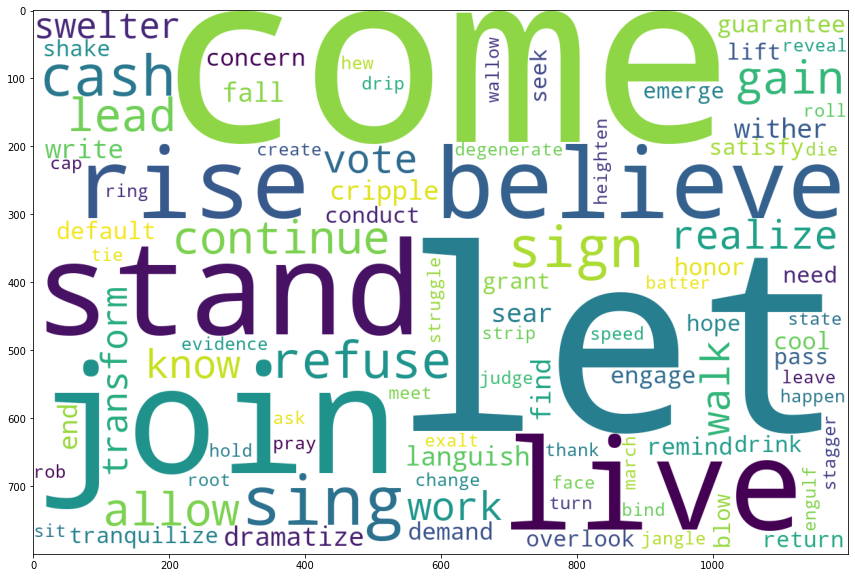

In [18]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud);

## Calculating Lexical diversity score

In [21]:
lemmas = []
for token in nlp(text):
    if token.pos_ in ['PUNCT', 'NUM', 'SPACE', 'X', 'PROPN', 'SYM']: continue
    if token.is_stop: continue
    lemmas.append(token.lemma_)

lemmas[:100]

['happy',
 'join',
 'today',
 'history',
 'great',
 'demonstration',
 'freedom',
 'history',
 'nation',
 'score',
 'year',
 'ago',
 'great',
 'symbolic',
 'shadow',
 'stand',
 'today',
 'sign',
 'momentous',
 'decree',
 'come',
 'great',
 'beacon',
 'light',
 'hope',
 'million',
 'negro',
 'slave',
 'sear',
 'flame',
 'wither',
 'injustice',
 'come',
 'joyous',
 'daybreak',
 'end',
 'long',
 'night',
 'captivity',
 'year',
 'later',
 'free',
 'year',
 'later',
 'life',
 'sadly',
 'cripple',
 'manacle',
 'segregation',
 'chain',
 'discrimination',
 'year',
 'later',
 'live',
 'lonely',
 'island',
 'poverty',
 'midst',
 'vast',
 'ocean',
 'material',
 'prosperity',
 'year',
 'later',
 'languish',
 'corner',
 'american',
 'society',
 'find',
 'exile',
 'land',
 'come',
 'today',
 'dramatize',
 'shameful',
 'condition',
 'sense',
 'come',
 'nation',
 'capital',
 'cash',
 'check',
 'architect',
 'republic',
 'write',
 'magnificent',
 'word',
 'sign',
 'promissory',
 'note',
 'fall',
 'heir'

In [22]:
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 117 kB 15.9 MB/s 


In [23]:
ld.ttr(lemmas)

0.5829457364341085

In [27]:
ld.msttr(lemmas, window_length=50)

0.8116666666666666

In [28]:
print(f'The size of tokens is {len(lemmas)}')

The size of tokens is 645
